# Importamos Librerias

In [1]:
from tensorflow.keras.datasets import imdb as dataset
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Cargamos y analizamos el dataset

In [2]:
# Primer hyperparámetro
num_words=10000

(training_data, training_targets), (testing_data, testing_targets) = dataset.load_data(num_words=num_words+2)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
# Tengo dos categorías: Sentimiento positivo (1) o sentimiento negativo (0)
num_categories = len(np.unique(targets))
print("Categories:", np.unique(targets))
# Tengo num_words palabras únicas en el vocabulario
print("Number of unique words:", len(np.unique(np.hstack(data))))

Categories: [0 1]
Number of unique words: 10000


In [4]:
# Longitudes promedio de los comentarios de las películas
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


# Impresión de comentario preprocesado con su etiqueta

In [5]:
# Imprimo cometario i'esimo con su clasificación de sentimiento
for i in range(5):
  print("Label:", targets[i])
  # Las comentarios ya están preprocesados
  print(data[i])

Label: 1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Label: 0
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1

In [6]:
# Bajamos diccionario de palabras a indices
index = dataset.get_word_index()
print([f'{k}:{v}' for k,v in index.items()][:100])

1654784/1641221 [==============================] - 0s 0us/step
['fawn:34701', 'tsukino:52006', 'nunnery:52007', 'sonja:16816', 'vani:63951', 'woods:1408', 'spiders:16115', 'hanging:2345', 'woody:2289', 'trawling:52008', "hold's:52009", 'comically:11307', 'localized:40830', 'disobeying:30568', "'royale:52010", "harpo's:40831", 'canet:52011', 'aileen:19313', 'acurately:52012', "diplomat's:52013", 'rickman:25242', 'arranged:6746', 'rumbustious:52014', 'familiarness:52015', "spider':52016", 'hahahah:68804', "wood':52017", 'transvestism:40833', "hangin':34702", 'bringing:2338', 'seamier:40834', 'wooded:34703', 'bravora:52018', 'grueling:16817', 'wooden:1636', 'wednesday:16818', "'prix:52019", 'altagracia:34704', 'circuitry:52020', 'crotch:11585', 'busybody:57766', "tart'n'tangy:52021", 'burgade:14129', 'thrace:52023', "tom's:11038", 'snuggles:52025', 'francesco:29114', 'complainers:52027', 'templarios:52125', '272:40835', '273:52028', 'zaniacs:52130', '275:34706', 'consenting:27631', 'snugg

In [7]:
# Armo diccionario reverso: de indices a palabras
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
print([f'{k}:{v}' for k,v in reverse_index.items()][:100])

['34701:fawn', '52006:tsukino', '52007:nunnery', '16816:sonja', '63951:vani', '1408:woods', '16115:spiders', '2345:hanging', '2289:woody', '52008:trawling', "52009:hold's", '11307:comically', '40830:localized', '30568:disobeying', "52010:'royale", "40831:harpo's", '52011:canet', '19313:aileen', '52012:acurately', "52013:diplomat's", '25242:rickman', '6746:arranged', '52014:rumbustious', '52015:familiarness', "52016:spider'", '68804:hahahah', "52017:wood'", '40833:transvestism', "34702:hangin'", '2338:bringing', '40834:seamier', '34703:wooded', '52018:bravora', '16817:grueling', '1636:wooden', '16818:wednesday', "52019:'prix", '34704:altagracia', '52020:circuitry', '11585:crotch', '57766:busybody', "52021:tart'n'tangy", '14129:burgade', '52023:thrace', "11038:tom's", '52025:snuggles', '29114:francesco', '52027:complainers', '52125:templarios', '40835:272', '52028:273', '52130:zaniacs', '34706:275', '27631:consenting', '40836:snuggled', '15492:inanimate', '52030:uality', '11926:bronte', 

In [8]:
for j in range(5):
  decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[j]] )
  print(data[j])
  print(decoded)
  print()

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
# this film was just brilliant casting location scenery stor

In [9]:
#Data es una lista que tiene 50000 listas de palabras
print(data[5])
len(data[5])

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]


43

In [10]:
data.shape #vemos que tenemos 50 mil listas

(50000,)

In [11]:
# obtenemos las longitudes de las listas en data
lengths= [ len(x) for x in data ]
print(lengths)

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177, 129, 140, 256, 888, 93, 142, 220, 193, 171, 221, 174, 647, 233, 162, 597, 234, 51, 336, 139, 231, 704, 142, 861, 132, 122, 570, 55, 214, 103, 186, 113, 169, 469, 138, 302, 766, 351, 146, 59, 206, 107, 152, 186, 431, 147, 684, 383, 324, 252, 263, 787, 211, 314, 118, 390, 132, 710, 306, 167, 115, 95, 158, 156, 82, 502, 314, 190, 174, 60, 145, 214, 659, 408, 515, 461, 202, 238, 170, 107, 171, 158, 145, 790, 258, 287, 67, 123, 975, 775, 236, 195, 274, 214, 91, 1038, 815, 183, 206, 50, 118, 147, 141, 60, 56, 439, 439, 213, 144, 533, 303, 203, 563, 129, 153, 55, 92, 174, 187, 183, 165, 78, 198, 156, 223, 127, 61, 362, 84, 57, 176, 159, 57, 159, 165, 213, 194, 149, 130, 203, 19, 98, 466, 525, 130, 322, 153, 408, 215, 472, 143, 136, 354, 260, 319, 125, 209, 282, 810, 142, 240, 148, 198, 193, 123, 128, 103, 479, 345, 263, 165, 205, 333, 184, 92, 177, 335, 120, 121, 259, 180, 160, 114, 59, 343, 513

In [12]:
len(lengths)

50000

# Graficamos la Distribución de las palabras

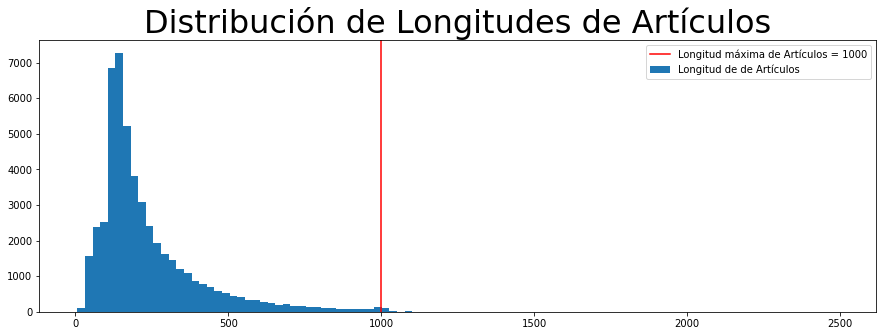

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,5))
plt.hist(lengths,bins=100,label="Longitud de de Artículos")
plt.title(label="Distribución de Longitudes de Artículos", fontsize="32",loc="center")
#plt.plot([500,500],[0,1750])
plt.axvline(x=1000, label='Longitud máxima de Artículos = {}'.format(1000), c="r")
plt.legend( loc="upper right")
plt.show()

Con este grafico podemos ver que la mayoría de los artículos tienen hasta mil palabras, para el análisis se podría haber cortado en 500 palabras.

# Padding y formateo de data para entrenar

In [14]:
# Hyperparametro - Longitud máxima de palabras 
maxlen=1000

In [15]:
data = pad_sequences(data,maxlen=maxlen)

In [16]:
# Verificamos que todos tengan longitud 1000
print(len(data[0]))
print(np.array([len(d) for d in data]).var())

1000
0.0


In [17]:
data=np.array(data)

In [18]:
data.shape

(50000, 1000)

# Armar una MLP usando Embeddings

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [20]:
from tensorflow.keras.layers import Embedding, Flatten, Dropout, GlobalAveragePooling1D
from tensorflow.keras import optimizers

In [21]:
# Cantidad de palabras totales contando las reservadas
nb_words=num_words+3
# Tamano del embedding. Es un hiperparámetro y puede modificarlo
embed_dim=128
salida_capa_densa = 1
dropout=0.5 # Hiperparámetro

model = Sequential()
model.add(Embedding(nb_words, embed_dim, input_length=maxlen, trainable=True))
model.add(Flatten())
# model.add(Dropout(dropout))
model.add(Dense(salida_capa_densa, activation='sigmoid'))

[embeddings](https://keras.io/api/layers/core_layers/embedding/)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 128)         1280384   
                                                                 
 flatten (Flatten)           (None, 128000)            0         
                                                                 
 dense (Dense)               (None, 1)                 128001    
                                                                 
Total params: 1,408,385
Trainable params: 1,408,385
Non-trainable params: 0
_________________________________________________________________


In [23]:
# MODIFIQUE HYPERPARAMS A GUSTO
adam = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(data, targets, batch_size=32, epochs=5) #, validation_split=0.2)

Epoch 1/5
1563/1563 [==============================] - 17s 9ms/step - loss: 0.3248 - accuracy: 0.8554
Epoch 2/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1168 - accuracy: 0.9613
Epoch 3/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0246 - accuracy: 0.9962
Epoch 4/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0014 - accuracy: 1.0000


# Embeddings

In [24]:
# TODO: Guardar en la variable embeddings los embeddings aprendidos por la red
embeddings = model.layers[0].get_weights()[0]

In [25]:
from sklearn.neighbors import NearestNeighbors

In [26]:
# Inicializar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest = NearestNeighbors( n_neighbors=10 , metric='cosine' )

In [27]:
# Entrenar un modelo de NearestNeighbors que devuelva los 10 vecinos más cercanos usando distancia coseno 
nearest.fit(embeddings)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [28]:
n_pad = 3
# Hacer una función que reciba una palabra e imrpimima las 10 palabras más cercanes:
# Probarla con las siguientes palabras: worst, great, excellent, brilliant, boring

def get_nearest_words(nearest, embeddings, palabra, index, reverse_index, n_pad = 3):
  # Tener en cuenta que para indexar correctamente la palabra en el embeddings debera tener en cuenta el padding inicial
  # También deberá formatearla como un tensor de rango 2
  # embeddings[index[palabra]+n_pad].reshape(1, -1)
  distances, nearest_indexes = nearest.kneighbors(embeddings[index[palabra]+n_pad].reshape(1, -1))
  lista_de_palabras = []
  for idx, d in zip(nearest_indexes[0], distances[0]):
    # Recordar restar el padding al reverse_index: reverse_index[idx-n_pad]
    lista_de_palabras.append(reverse_index[idx-n_pad])
  return lista_de_palabras

In [29]:
get_nearest_words(nearest, embeddings, 'boring', index, reverse_index, n_pad = 3)

['boring',
 'disappointment',
 'disappointing',
 'lifeless',
 'tedious',
 'unintentionally',
 'unfunny',
 'fails',
 'worst',
 'pretentious']

In [30]:
# Por si quiere guardar los embeddings
# np.save('embeddings', embeddings)

In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

In [32]:
# Inicializar modelo TSNE - Completar
tsne = TSNE(n_components=2, learning_rate='auto', init='random', verbose=1)

In [33]:
# Entrenar y transformar
%time embed_2d_tsne = tsne.fit_transform(embeddings) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10003 samples in 0.002s...
[t-SNE] Computed neighbors for 10003 samples in 2.618s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10003
[t-SNE] Computed conditional probabilities for sample 2000 / 10003
[t-SNE] Computed conditional probabilities for sample 3000 / 10003
[t-SNE] Computed conditional probabilities for sample 4000 / 10003
[t-SNE] Computed conditional probabilities for sample 5000 / 10003
[t-SNE] Computed conditional probabilities for sample 6000 / 10003
[t-SNE] Computed conditional probabilities for sample 7000 / 10003
[t-SNE] Computed conditional probabilities for sample 8000 / 10003
[t-SNE] Computed conditional probabilities for sample 9000 / 10003
[t-SNE] Computed conditional probabilities for sample 10000 / 10003
[t-SNE] Computed conditional probabilities for sample 10003 / 10003
[t-SNE] Mean sigma: 0.224267
[t-SNE] KL divergence after 250 iterations with early exaggeration: 111.643173
[t-SNE] KL

In [34]:
embed_2d_tsne.shape

(10003, 2)

# Graficar el TSNE con las siguientes palabras

In [35]:
palabras_malas = ['worst', 'boring', 'forgettable', 'uninteresting', 'awful', 'bad', 'waste', 'unwatchable', 'stinker', 'lousy', 'fails']
palabras_buenas = ['brilliant', 'excellent', 'superb', 'delightful', 'perfect', 'cool', 'nice', 'good', 'extraordinary', 'unforgettable']
palabras_neutras = ['the', 'of', 'it', 'tom', 'is', 'in', 'a', 'movie', 'hey', 'i', 'br', 'pay', 'gentleman', 'one', 
                    'performing', 'dont', 'white']

In [36]:
from matplotlib import pyplot as plt

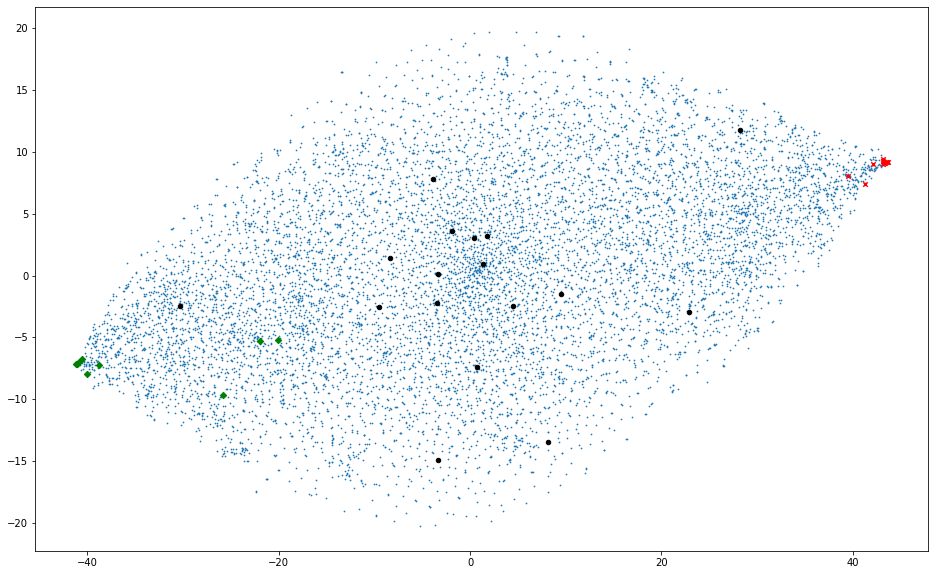

In [37]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d_tsne[:,0], embed_2d_tsne[:,1], s=0.5)
for palabra in palabras_malas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='r', s=20, marker='x')
for palabra in palabras_buenas:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='g', s=20, marker='D')
for palabra in palabras_neutras:
  plt.scatter(embed_2d_tsne[index[palabra]+n_pad][0], embed_2d_tsne[index[palabra]+n_pad][1], c='k', s=20)
plt.show()

# Graficar con TruncatedSVD

In [38]:
TSVD = TruncatedSVD(2)

In [39]:
embed_2d = TSVD.fit_transform(embeddings)

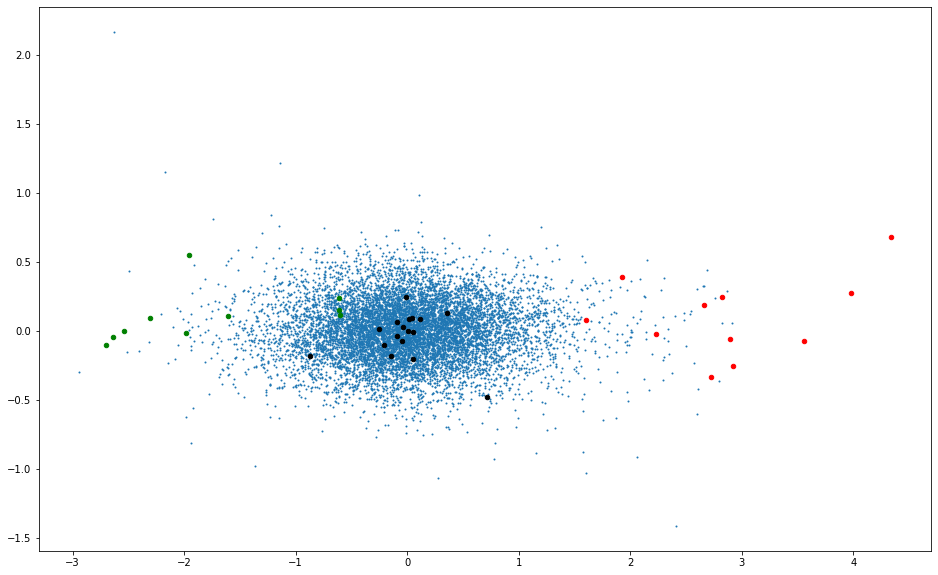

In [40]:
plt.figure(figsize=(16,10))
plt.scatter(embed_2d[:,0], embed_2d[:,1], s=1)
for palabra in palabras_malas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='r', s=20)
for palabra in palabras_buenas:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='g', s=20)
for palabra in palabras_neutras:
  plt.scatter(embed_2d[index[palabra]+n_pad][0], embed_2d[index[palabra]+n_pad][1], c='k', s=20)
plt.show()